# 1. Dataset Introduction

### 📁 Dataset Source

This dataset was obtained from Kaggle:
🔗 [Loan Predication Dataset by ninzaami](https://www.kaggle.com/datasets/ninzaami/loan-predication)

### 📝 Short Description & Problem Statement

This dataset simulates a business problem where a company wants to **automate (in real-time) the loan qualifying procedure** based on information provided by customers while filling out online application forms. 

It is expected that the development of ML models can help the company predict loan approval to **accelerate the decision-making process** in determining whether an applicant is eligible for a loan or not.

### 🎯 Notebook Objectives

This notebook is created with the main objectives:
1.  **Exploratory Data Analysis (EDA):** To analyze customer data patterns and relationships between features.
2.  **Prediction:** To build various Machine Learning models to determine loan approval.

### 🔢 General Information

* **Data Points (Rows):** 614
* **Features (Columns):** 13
* **Analysis Type:** Binary Classification
    (Is the loan approved: `Y = Yes`, `N = No`)

### 🧬 Feature Description

| Column Name | Description |
| :--- | :--- |
| `Loan_ID` | Unique Loan ID (e.g., LP001002) |
| `Gender` | Applicant Gender (`Male`, `Female`) |
| `Married` | Marital Status (`Yes`, `No`) |
| `Dependents` | Number of Dependents (0, 1, 2, 3+) |
| `Education` | Education Level (`Graduate`, `Not Graduate`) |
| `Self_Employed` | Self-Employed Status (`Yes`, `No`) |
| `ApplicantIncome` | Applicant Income |
| `CoapplicantIncome` | Co-applicant Income |
| `LoanAmount` | Loan Amount (in thousands) |
| `Loan_Amount_Term` | Term of loan (in months) |
| `Credit_History` | Credit history meets guidelines (`1.0` = Yes, `0.0` = No) |
| `Property_Area` | Property location (`Urban`, `Semiurban`, `Rural`) |
| `Loan_Status` | **Target**: Approval Status (`Y`, `N`) |

### 🛠️ Machine Learning Models

In this project, we will explore and compare the performance of the following models:
1.  Logistic Regression
2.  K-Nearest Neighbour (KNN)
3.  Support Vector Machine (SVM)
4.  Naive Bayes
5.  Decision Tree
6.  Random Forest
7.  Gradient Boosting

# 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 3. Loading Dataset

In [2]:
df = pd.read_csv('loan_dataset.csv')

# 4. Data Exploration

In [3]:
# Display the first few rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Insight:
Berdasarkan tinjauan awal menggunakan `df.info()`, dataset ini terdiri dari 614 entri dan 13 fitur. Terdapat indikasi masalah kualitas data berupa nilai yang hilang (missing values) pada beberapa fitur krusial. `Fitur Credit_History`, `Self_Employed`, `LoanAmount`, `Dependents`, `Loan_Amount_Term`, `Gender`, dan `Married` memiliki jumlah non-null di bawah 614, yang menandakan adanya data kosong yang perlu ditangani melalui teknik imputasi.

Selain itu, dari segi tipe data, dataset ini didominasi oleh tipe kategorikal (object) sebanyak 8 fitur, sedangkan tipe numerik terdiri dari 4 fitur `float64` dan 1 fitur `int64`. Perlu diperhatikan bahwa fitur `Credit_History` dan `Loan_Amount_Term` terbaca sebagai numerik (float64), namun secara semantik fitur ini sebenarnya bersifat kategorikal atau ordinal, sehingga mungkin memerlukan penyesuaian tipe data saat preprocessing.

#### Solving Data Issues

##### a. `Dependents`

In [5]:
# Melihat jumlah masing-masing nilai di kolom Dependents
print(df['Dependents'].value_counts())

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


In [6]:
# checking for NaN 
print(df['Dependents'].value_counts(dropna=False))

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64


Data Imputation

In [7]:
# 1. Ganti '3+' menjadi '4' agar bisa jadi angka
df['Dependents'] = df['Dependents'].replace('3+', '3')

# 2. Isi data yang kosong (NaN) dengan '0' (karena mayoritas orang tidak punya tanggungan)
df['Dependents'] = df['Dependents'].fillna('0')

# 3. Ubah tipe data dari Object (Teks) menjadi Integer (Angka)
df['Dependents'] = df['Dependents'].astype(int)

print(df['Dependents'].value_counts())
print(df['Dependents'].dtype)

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64
int64


In [8]:
df["Dependents"] = df["Dependents"].apply(lambda x: int(x.strip('+')) if isinstance(x, str) else x)
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df["Dependents"].unique()

array([0, 1, 2, 3])

In [10]:
df["Dependents"].isna().sum()

np.int64(0)

In [11]:
# checking for NaN 
print(df['Dependents'].value_counts(dropna=False))

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64


### 5. Data Preprocessing

##### a. Defining numerical and categorial columns

In [12]:
# Defining numerical and categorial columns
num_cols = ["Dependents", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
cat_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed","Credit_History", "Property_Area", "Loan_Status"]

##### b. handling missing value

In [13]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


##### c. Numerical Encoding

Converting `Yes` or `No` column with 0 or 1

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
def normalize_bool_col(col):
    df[col] = df[col].str.strip().replace({
        "Yes": 1,
        'Y': 1,
        "No": 0,
        "N": 0
    })
    

normalize_bool_col("Married")
normalize_bool_col("Loan_Status")
normalize_bool_col("Self_Employed")

In [17]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
117,LP001405,Male,1,1,Graduate,0,2214,1398.0,85.0,360.0,1.0,Urban,1
146,LP001516,Female,1,2,Graduate,0,14866,0.0,70.0,360.0,1.0,Urban,1
389,LP002250,Male,1,0,Graduate,0,5488,0.0,125.0,360.0,1.0,Rural,1
457,LP002467,Male,1,0,Graduate,0,3708,2569.0,173.0,360.0,1.0,Urban,0
142,LP001504,Male,0,0,Graduate,1,6950,0.0,175.0,180.0,1.0,Semiurban,1
115,LP001401,Male,1,1,Graduate,0,14583,0.0,185.0,180.0,1.0,Rural,1
55,LP001194,Male,1,2,Graduate,0,2708,1167.0,97.0,360.0,1.0,Semiurban,1
598,LP002945,Male,1,0,Graduate,1,9963,0.0,180.0,360.0,1.0,Rural,1
510,LP002637,Male,0,0,Not Graduate,0,3598,1287.0,100.0,360.0,1.0,Rural,0
21,LP001046,Male,1,1,Graduate,0,5955,5625.0,315.0,360.0,1.0,Urban,1


##### d. Categorical Encoding 

In [18]:
df_encoded = pd.get_dummies(df, columns=['Gender', "Education", "Property_Area"], drop_first=False)
df_encoded

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,0,0,5849,0.0,128.0,360.0,1.0,1,False,True,True,False,False,False,True
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,0,False,True,True,False,True,False,False
2,LP001005,1,0,1,3000,0.0,66.0,360.0,1.0,1,False,True,True,False,False,False,True
3,LP001006,1,0,0,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,False,False,True
4,LP001008,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,2900,0.0,71.0,360.0,1.0,1,True,False,True,False,True,False,False
610,LP002979,1,3,0,4106,0.0,40.0,180.0,1.0,1,False,True,True,False,True,False,False
611,LP002983,1,1,0,8072,240.0,253.0,360.0,1.0,1,False,True,True,False,False,False,True
612,LP002984,1,2,0,7583,0.0,187.0,360.0,1.0,1,False,True,True,False,False,False,True


In [19]:
cols = ["Gender_Female", "Gender_Male", "Education_Graduate", "Education_Not Graduate", "Property_Area_Rural", "Property_Area_Semiurban", "Property_Area_Urban"]
df_encoded[cols] = df_encoded[cols].apply(lambda x: x.astype(int))
df_encoded.head()

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,0,0,1
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,1,0,0
2,LP001005,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,0,0,1
3,LP001006,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,0,1
4,LP001008,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,1


In [20]:
# Remove duplicates based on all columns
print(f'Shape of Loan Dataset before drop duplicated Row is: {df.shape}')
df = df.drop_duplicates()
print(f'Shape of Loan Dataset After Drop Duplicated Row is: {df.shape}')

Shape of Loan Dataset before drop duplicated Row is: (614, 13)
Shape of Loan Dataset After Drop Duplicated Row is: (614, 13)


### 6. Train-Test Split

In [21]:
df_encoded = df_encoded.drop("Loan_ID", axis=1)
df_encoded.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,0,0,1
1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,1,0,0
2,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,0,0,1
3,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,0,1
4,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,1


##### a. Splitting dataset

In [22]:
x = df_encoded.drop("Loan_Status", axis=1)
y = df_encoded["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

##### b. Feature Scaling

In [23]:
scaler = StandardScaler()

x_train[cols] = scaler.fit_transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

x_train.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
154,0,0,0,3254,0.0,50.0,360.0,1.0,-0.464054,0.464054,0.540468,-0.540468,-0.647360,-0.774176,1.425084
239,1,1,0,3315,0.0,96.0,360.0,1.0,-0.464054,0.464054,0.540468,-0.540468,-0.647360,1.291696,-0.701713
448,1,2,0,3340,1710.0,150.0,360.0,0.0,-0.464054,0.464054,0.540468,-0.540468,1.544735,-0.774176,-0.701713
471,1,1,0,2653,1500.0,113.0,180.0,0.0,-0.464054,0.464054,-1.850250,1.850250,1.544735,-0.774176,-0.701713
273,1,0,0,2620,2223.0,150.0,360.0,1.0,-0.464054,0.464054,0.540468,-0.540468,-0.647360,1.291696,-0.701713


In [24]:
x_test.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
150,0,0,0,6277,0.0,118.0,360.0,0.0,-0.464054,0.464054,0.540468,-0.540468,1.544735,-0.774176,-0.701713
559,1,0,0,4180,2306.0,182.0,360.0,1.0,2.154920,-2.154920,0.540468,-0.540468,-0.647360,1.291696,-0.701713
598,1,0,1,9963,0.0,180.0,360.0,1.0,-0.464054,0.464054,0.540468,-0.540468,1.544735,-0.774176,-0.701713
235,1,1,0,5500,1260.0,170.0,360.0,1.0,-0.464054,0.464054,0.540468,-0.540468,1.544735,-0.774176,-0.701713
145,1,0,0,2330,4486.0,100.0,360.0,1.0,2.154920,-2.154920,0.540468,-0.540468,-0.647360,1.291696,-0.701713


### 7 Exploratory Data Analysis (EDA)

### 7.1 Categotical Variable

##### 7.1.1 Loan ID

In [25]:
df.Loan_ID.value_counts(dropna=False)

Loan_ID
LP001002    1
LP001003    1
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    1
Name: count, Length: 614, dtype: int64

##### 7.1.2 Gender

In [26]:
df.Gender.value_counts(dropna=False)

Gender
Male      502
Female    112
Name: count, dtype: int64

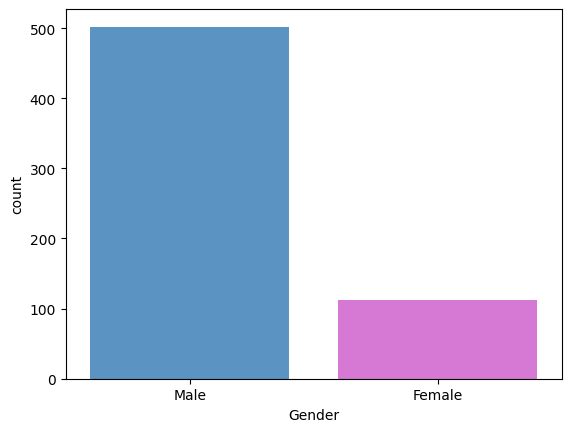

In [27]:
gender_color = {"Male": "#4A95D3", "Female": "#E56AE3"}
sns.countplot(x="Gender", data=df, palette=gender_color, hue="Gender", legend=False)
plt.show()

In [28]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 81.76%
Percentage of Female applicant: 18.24%
Missing values percentage: 0.00%


##### 7.1.3 Education

In [29]:
df.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

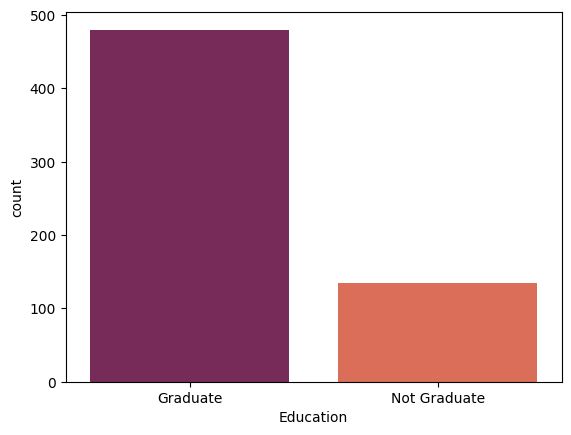

In [30]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [31]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


##### 7.1.4 Marital Status

In [32]:
df.Married.value_counts(dropna=False)

Married
1    401
0    213
Name: count, dtype: int64

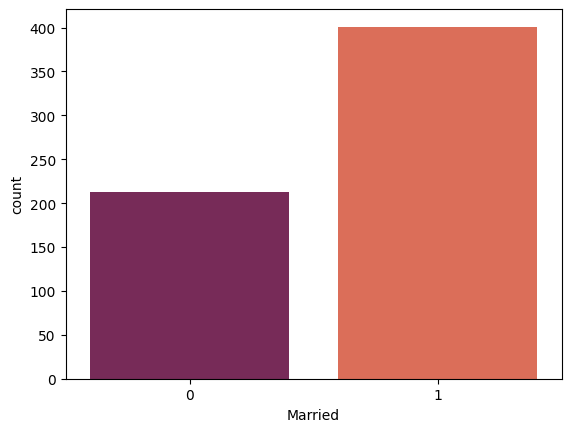

In [33]:
sns.countplot(x="Married", data=df, palette="rocket")
plt.show()

In [34]:
countMarried = len(df[df.Married == '1'])
countNotMarried = len(df[df.Married == '0'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 0.00%
Percentage of Not married applicant: 0.00%
Missing values percentage: 0.00%


##### 7.1.5 Occupation

In [35]:
df.Self_Employed.value_counts(dropna=False)

Self_Employed
0    532
1     82
Name: count, dtype: int64

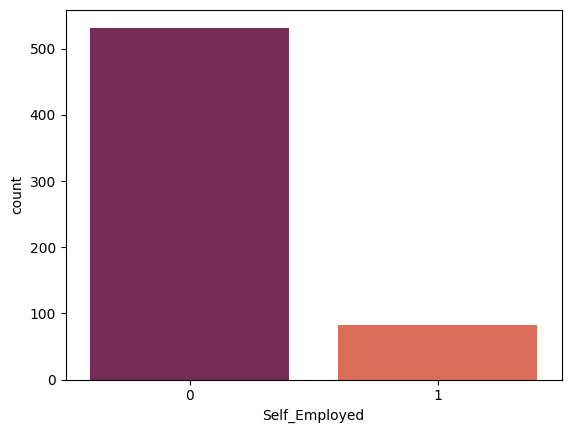

In [36]:
sns.countplot(x="Self_Employed", data=df, palette="rocket")
plt.show()

In [37]:
countNo = len(df[df.Self_Employed == '1'])
countYes = len(df[df.Self_Employed == '0'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 0.00%
Percentage of self employed: 0.00%
Missing values percentage: 0.00%


##### 7.1.6 Credit History

In [38]:
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

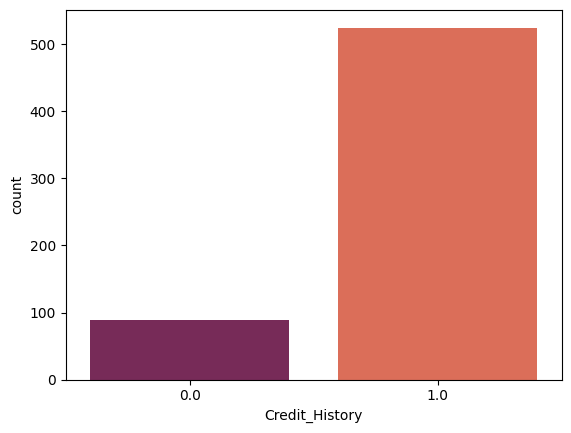

In [39]:
sns.countplot(x="Credit_History", data=df, palette="rocket")
plt.show()

In [40]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 85.50%
Percentage of Bad credit history: 14.50%
Missing values percentage: 0.00%


##### 7.1.7 Applicant Count by Region

In [41]:
df.Property_Area.value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

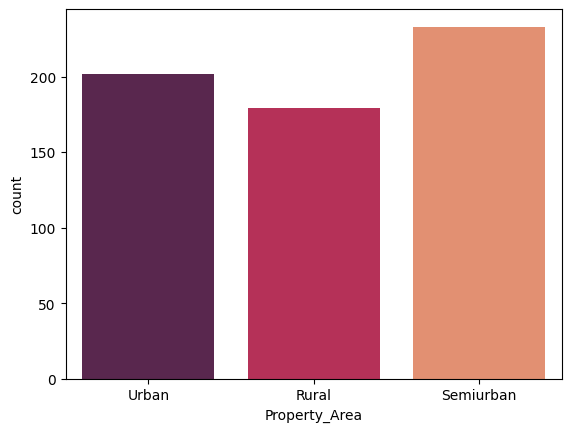

In [42]:
sns.countplot(x="Property_Area", data=df, palette="rocket")
plt.show()

In [43]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


##### 7.1.7 Loan Approval Status Distribution

In [44]:
df.Loan_Status.value_counts(dropna=False)

Loan_Status
1    422
0    192
Name: count, dtype: int64

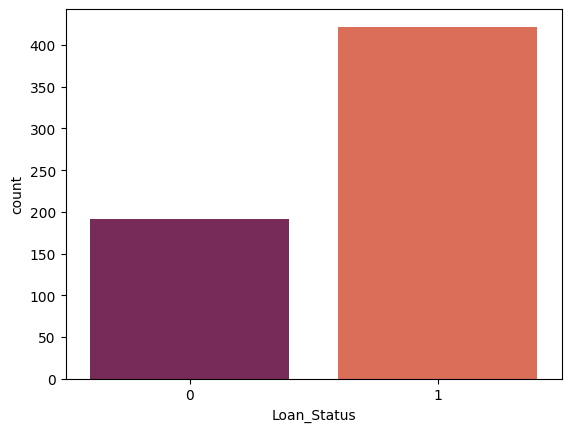

In [45]:
sns.countplot(x="Loan_Status", data=df, palette="rocket")
plt.show()

In [46]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 0.00%
Percentage of Rejected: 0.00%
Missing values percentage: 0.00%


##### 7.1.8  Loan Amount Term

In [47]:
df.Loan_Amount_Term.value_counts(dropna=False)

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

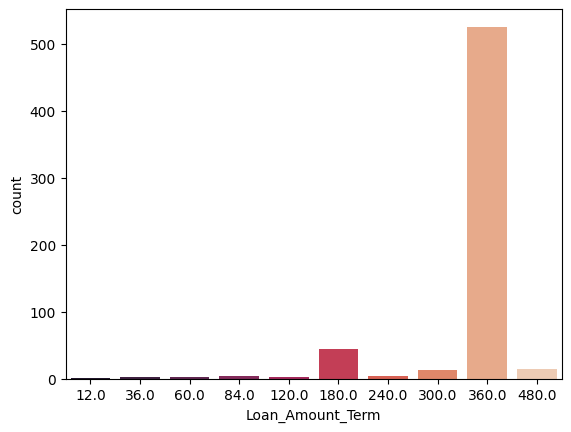

In [48]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

### 7.2 Data Processing

In [49]:
df.shape

(614, 13)

In [50]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [51]:
df.shape

(614, 13)

### 7.3 Features Separated 

Dependent features `Loan_Status` will be seperated from independent features.

In [52]:
df.shape

(614, 13)

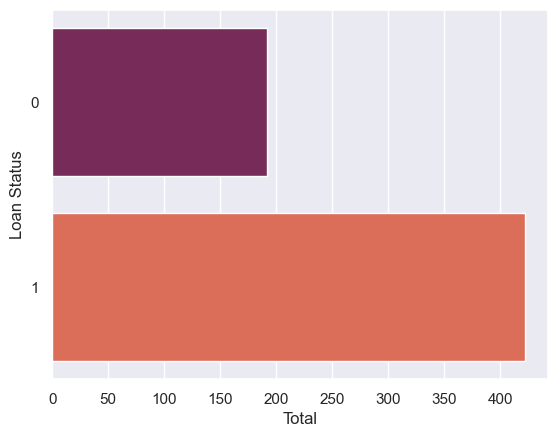

In [53]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=X, palette="rocket")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [54]:
X.shape

(614, 12)

## 8. Modeling

### 8.1 Logestic Regression

In [55]:
# A function to evaluate the train and test accuracy
def accuracy(model, X_train, y_train, X_test, y_test):

    # Train accuracy
    y_pred_train = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    
    # Test accuracy
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    print(f"Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

In [56]:
def get_classification_report(model, X_train, y_train, X_test, y_test):

    results = {}
    
    # Classification Report for Train
    y_pred_train = model.predict(X_train)
    results["Train Classification Report"] = classification_report(y_train, y_pred_train)
    
    # Classification Report for Test
    y_pred_test = model.predict(X_test)
    results["Test Classification Report"] = classification_report(y_test, y_pred_test)
    
    return results

#### 8.1.1 Model training with L1 regularization

In [57]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(x_train, y_train)
y_pred_l1 = model_l1.predict(x_test)

accuracy(model_l1, x_train, y_train, x_test, y_test)

Train Accuracy: 0.8004073319755601, Test Accuracy: 0.8617886178861789


C:\Users\user\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


#### 8.1.2 Model training with L2 regularization

In [58]:
model_l2 = LogisticRegression(penalty='l2', solver='liblinear')
model_l2.fit(x_train, y_train)
y_pred_l2 = model_l2.predict(x_test)

accuracy(model_l2, x_train, y_train, x_test, y_test)

Train Accuracy: 0.8004073319755601, Test Accuracy: 0.8617886178861789


In [59]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f" {model_name} Evaluation:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("")

In [60]:
evaluate_model(y_test, y_pred_l1, "Logistic Regression 1")
evaluate_model(y_test, y_pred_l2, "Logistic Regression 2")

 Logistic Regression 1 Evaluation:
Accuracy : 0.8618
Precision: 0.8400
Recall   : 0.9882
F1 Score : 0.9081

 Logistic Regression 2 Evaluation:
Accuracy : 0.8618
Precision: 0.8400
Recall   : 0.9882
F1 Score : 0.9081



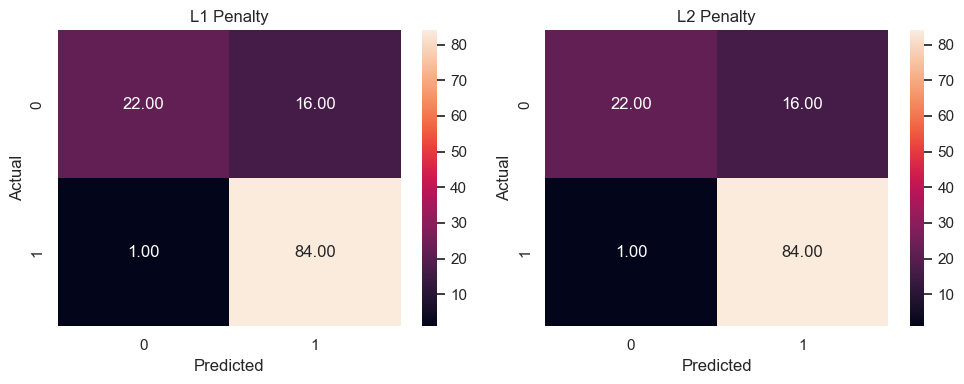

In [61]:
cm_l1 = confusion_matrix(y_test, y_pred_l1)
cm_l2 = confusion_matrix(y_test, y_pred_l2)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(cm_l1, annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("L1 Penalty")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_l2, annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("L2 Penalty")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

L1 Logistic Regression AUC: 0.8619
L2 Logistic Regression AUC: 0.8653


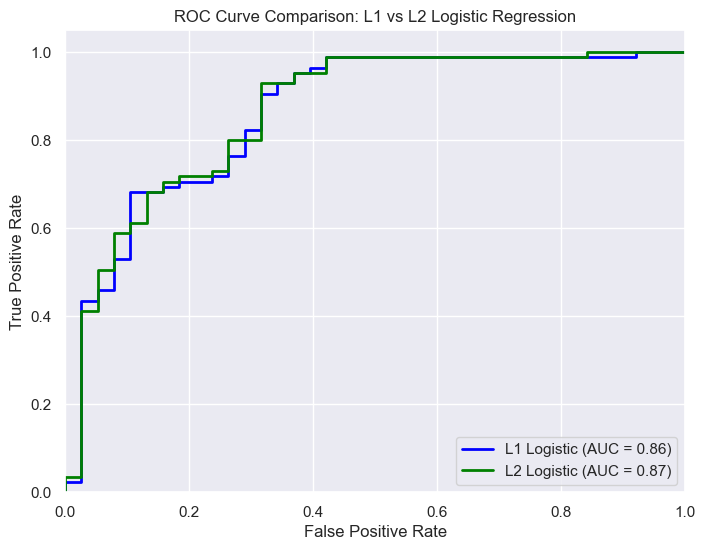

In [62]:
# ROC and AUC Score

y_prob_l1 = model_l1.predict_proba(x_test)[:, 1]
y_prob_l2 = model_l2.predict_proba(x_test)[:, 1]

fpr_l1, tpr_l1, _ = roc_curve(y_test, y_prob_l1)
fpr_l2, tpr_l2, _ = roc_curve(y_test, y_prob_l2)

# Calcualating AUC
auc_l1 = roc_auc_score(y_test, y_prob_l1)
auc_l2 = roc_auc_score(y_test, y_prob_l2)

print(f"L1 Logistic Regression AUC: {auc_l1:.4f}")
print(f"L2 Logistic Regression AUC: {auc_l2:.4f}")

# Plotting ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_l1, tpr_l1, color='blue', lw=2, label=f'L1 Logistic (AUC = {auc_l1:.2f})')
plt.plot(fpr_l2, tpr_l2, color='green', lw=2, label=f'L2 Logistic (AUC = {auc_l2:.2f})')


plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: L1 vs L2 Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 8.2 Logestic Regression with GridSearchCV

In [63]:
model_grid = LogisticRegression()

param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.013, 0.02, 0.03, 0.05, 0.06, 0.07],
    "solver": ["liblinear"],
    "max_iter": [1000]
}

grid_search = GridSearchCV(
    estimator=model_grid,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'C': 0.06, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.8684492604059167


C:\Users\user\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


In [64]:
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(x_test)
y_prob_grid = best_model.predict_proba(x_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print("Precision:", precision_score(y_test, y_pred_grid))
print("Recall:", recall_score(y_test, y_pred_grid))
print("F1 Score:", f1_score(y_test, y_pred_grid))

Accuracy: 0.8617886178861789
Precision: 0.84
Recall: 0.9882352941176471
F1 Score: 0.9081081081081082


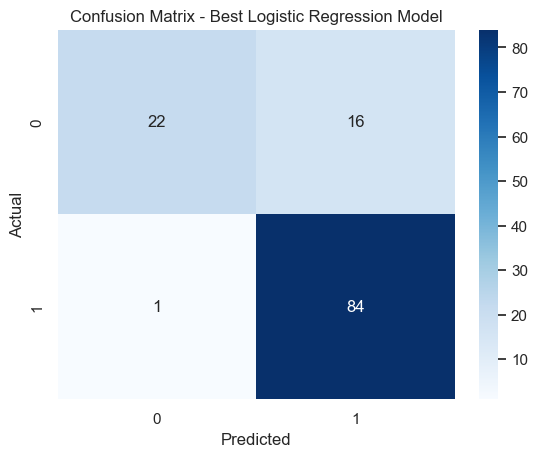

In [65]:
cm = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Logistic Regression Model")
plt.show()

### 8.3 Decision Tree

#### 8.3.1 Without GridSearchCV

In [66]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [67]:
accuracy(model_dt, x_train, y_train, x_test, y_test)

Train Accuracy: 1.0, Test Accuracy: 0.7723577235772358


#### 8.3.2 Decision Tree (Using GridSearchCV)

In [68]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

model_dt_grid = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=model_dt_grid,
    param_grid=params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train, y_train)


best_dt = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'random'}
Best CV Score: 0.8004122861265719


In [69]:
best_dt = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'random'}
Best CV Score: 0.8004122861265719


In [70]:
best_dt_grid = grid_search.best_estimator_

accuracy(best_dt_grid, x_train, y_train, x_test, y_test)

Train Accuracy: 0.7983706720977597, Test Accuracy: 0.8536585365853658


In [71]:
report_results = get_classification_report(best_dt, x_train, y_train, x_test, y_test)

print("Train Classification Report:")
print(report_results["Train Classification Report"])
print("-"*50)

print("Test Classification Report:")
print(report_results["Test Classification Report"])

Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.40      0.55       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491

--------------------------------------------------
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [72]:
y_pred_dt = model_dt.predict(x_test)
y_prob_dt = model_dt.predict_proba(x_test)[:,1]

y_pred_dt_grid = best_dt_grid.predict(x_test)
y_prob_dt_grid = best_dt_grid.predict_proba(x_test)[:,1]

### 8.4 K-Nearest Neighbour (KNN)

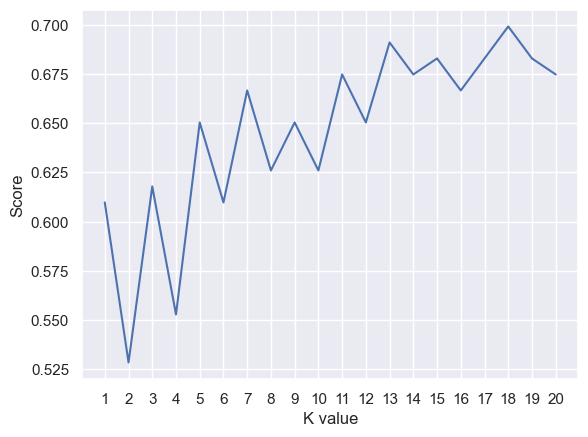

KNN best accuracy: 69.92%


In [75]:
scoreknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(x_train, y_train)
    scoreknn.append(KNclassifier.score(x_test, y_test))

plt.plot(range(1,21), scoreknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## 9. Comparing Models

In [80]:
# Saving the results in a dataframe to plot it
results = [
    {
        "Model": "L1 Logistic",
        "Accuracy": accuracy_score(y_test, y_pred_l1),
        "Precision": precision_score(y_test, y_pred_l1),
        "Recall": recall_score(y_test, y_pred_l1),
        "F1 Score": f1_score(y_test, y_pred_l1),
        "AUC": roc_auc_score(y_test, y_prob_l1)
    },
    {
        "Model": "L2 Logistic",
        "Accuracy": accuracy_score(y_test, y_pred_l2),
        "Precision": precision_score(y_test, y_pred_l2),
        "Recall": recall_score(y_test, y_pred_l2),
        "F1 Score": f1_score(y_test, y_pred_l2),
        "AUC": roc_auc_score(y_test, y_prob_l2)
    },
    {
        "Model": "GridSearch Logistic",
        "Accuracy": accuracy_score(y_test, y_pred_grid),
        "Precision": precision_score(y_test, y_pred_grid),
        "Recall": recall_score(y_test, y_pred_grid),
        "F1 Score": f1_score(y_test, y_pred_grid),
        "AUC": roc_auc_score(y_test, y_prob_grid)
    },
    {
        "Model": "Decision Tree",
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Precision": precision_score(y_test, y_pred_dt),
        "Recall": recall_score(y_test, y_pred_dt),
        "F1 Score": f1_score(y_test, y_pred_dt),
        "AUC": roc_auc_score(y_test, y_prob_dt)
    },
    {
        "Model": "GridSearch Decision Tree",
        "Accuracy": accuracy_score(y_test, y_pred_dt_grid),
        "Precision": precision_score(y_test, y_pred_dt_grid),
        "Recall": recall_score(y_test, y_pred_dt_grid),
        "F1 Score": f1_score(y_test, y_pred_dt_grid),
        "AUC": roc_auc_score(y_test, y_prob_dt_grid)
    },
    {
        "Model": "K-Nearest Neighbors",
        "Accuracy": accuracy_score(y_test, y_pred_dt_grid),
        "Precision": precision_score(y_test, y_pred_dt_grid),
        "Recall": recall_score(y_test, y_pred_dt_grid),
        "F1 Score": f1_score(y_test, y_pred_dt_grid),
        "AUC": roc_auc_score(y_test, y_prob_dt_grid)
    }
]

df_results = pd.DataFrame(results)

df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

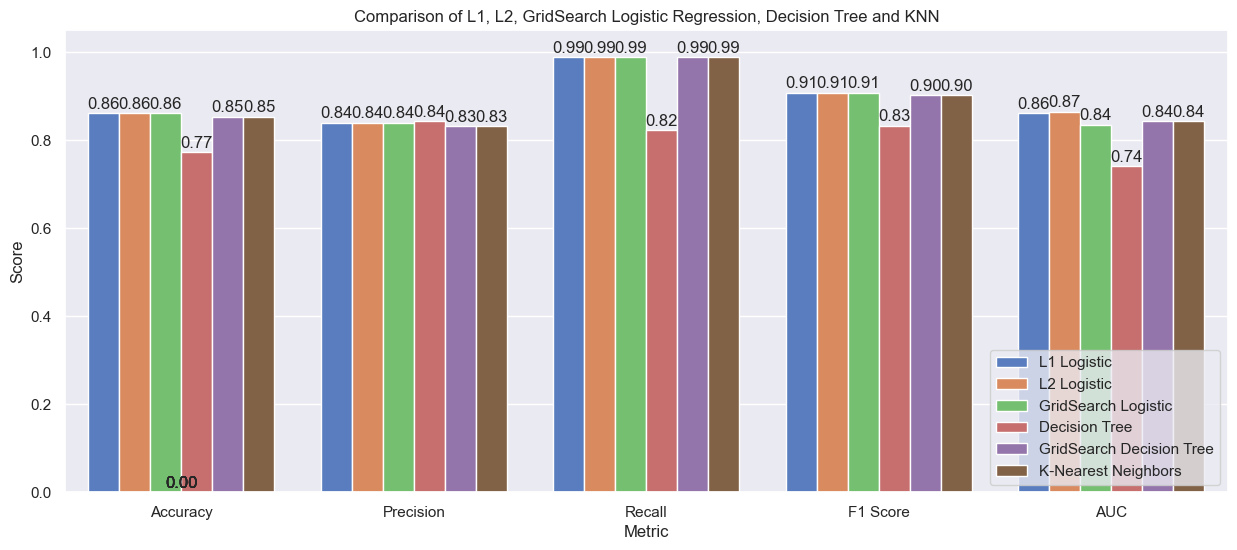

In [82]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model", palette="muted")

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2, y=height + 0.01, s=f'{height:.2f}', ha='center')

plt.title("Comparison of L1, L2, GridSearch Logistic Regression, Decision Tree and KNN")
plt.ylim(0,1.05)
plt.legend(loc='lower right')
plt.show()


Dari hasil komparasi model di atas, terlihat jelas bahwa Logistic Regression tampil sebagai juara umum dengan performa yang paling solid dan konsisten. Varian L1, L2, maupun hasil tuning-nya sama-sama mendominasi dengan akurasi stabil di angka 86%, jauh mengungguli Decision Tree standar yang sempat 'keteteran' di posisi terendah (77%).

Yang paling menarik perhatian adalah skor Recall pada Logistic Regression yang nyaris sempurna (0.99). Ini adalah sinyal kuat bahwa model ini sangat sensitif dan hampir tidak pernah gagal mendeteksi target positif. Meskipun kita melihat bahwa teknik GridSearch terbukti ampuh 'menyelamatkan' performa Decision Tree hingga bisa bersaing ketat dengan KNN, namun stabilitas Logistic Regression secara keseluruhan menjadikannya kandidat yang paling aman dan reliabel untuk dipilih sebagai model utama proyek ini.